# Q8

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('Iris.csv', sep=',')
df

,Unnamed: 0,Class,Petal length,Sepal length,Sepal width,Petal width
0,0,1,51,35,14,2
1,1,1,49,30,14,2
2,2,1,47,32,13,2
3,3,1,46,31,15,2
4,4,1,50,36,14,2
...,...,...,...,...,...,...
145,145,3,67,30,52,23
146,146,3,63,25,50,19
147,147,3,65,30,52,20
148,148,3,62,34,54,23


In [33]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
x = df.drop('Class', axis=1)
y = df['Class']

In [34]:
from sklearn.preprocessing import MinMaxScaler

x_stan = MinMaxScaler().fit_transform(X=x)

In [35]:
from sklearn.model_selection import train_test_split
x_stan_train,x_stan_test,y_train,y_test = train_test_split(x_stan,y,test_size=0.2)

1

In [36]:
def weighted_classification(distance,y):
    sum1=0
    sum2=0
    sum3=0
    for i in range(len(distance)):
        if y[i] == 1: sum1+=1/((distance[i]+0.00000001)**2)
        if y[i] == 2: sum2+=1/((distance[i]+0.00000001)**2)
        if y[i] == 3: sum3+=1/((distance[i]+0.00000001)**2)
    if sum1>=sum2 and sum1>=sum3: return 1
    if sum2>=sum1 and sum2>=sum3: return 2
    if sum3>=sum2 and sum3>=sum1: return 3

In [38]:
from sklearn.neighbors import KDTree
from copy import deepcopy
from sklearn.metrics import accuracy_score
import numpy as np 

myTree = KDTree(x_stan_train)
acc = []
y_test = np.array(y_test)
y_test_predict = deepcopy(y_test)
for k in range(30):
    for i in range(y_test.shape[0]):
        distance,index = myTree.query(x_stan_test[i].reshape(-1, 4), k = k+1)
        distance = distance.reshape((-1,)).tolist()
        index = index.reshape((-1,)).tolist()
        index = np.array(index)
        distance = np.array(distance)
        y_temp = np.array(y)
        y_neighbors = y_temp[index]
        y_test_predict[i] = weighted_classification(distance,y_neighbors)
    acc.append(accuracy_score(y_test,y_test_predict))
    print(f"accuracy score on test set with k={k+1}: ",accuracy_score(y_test,y_test_predict))  
print(f"Max accuracy is {max(acc)} and laest k that have this value is {np.argmax(acc)+1}") 

accuracy score on test set with k=1:  0.23333333333333334
accuracy score on test set with k=2:  0.23333333333333334
accuracy score on test set with k=3:  0.2
accuracy score on test set with k=4:  0.2
accuracy score on test set with k=5:  0.2
accuracy score on test set with k=6:  0.23333333333333334
accuracy score on test set with k=7:  0.3
accuracy score on test set with k=8:  0.3
accuracy score on test set with k=9:  0.3
accuracy score on test set with k=10:  0.3
accuracy score on test set with k=11:  0.3
accuracy score on test set with k=12:  0.3333333333333333
accuracy score on test set with k=13:  0.36666666666666664
accuracy score on test set with k=14:  0.3333333333333333
accuracy score on test set with k=15:  0.3333333333333333
accuracy score on test set with k=16:  0.3333333333333333
accuracy score on test set with k=17:  0.36666666666666664
accuracy score on test set with k=18:  0.36666666666666664
accuracy score on test set with k=19:  0.43333333333333335
accuracy score on te

برای ما مقدار 19 همسایگی بهترین است زیرا بیشترین میزان دقت را دارد و پیچیدگی کمتری هم نسبت به بقیه با این درصد از دقت دارد.

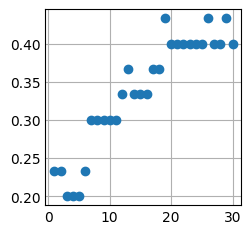

In [39]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

em = []
for i in range(30):
    em.append(i+1)
x1 = em
y1 = acc

fig, ax = plt.subplots()

ax.scatter(x1, y1)

plt.show()

In [40]:
from sklearn.neighbors import KDTree
from copy import deepcopy
from sklearn.metrics import accuracy_score
import numpy as np 

myTree = KDTree(x_stan_train)
y_test = np.array(y_test)
y_test_predict = deepcopy(y_test)
for i in range(y_test.shape[0]):
    distance,index = myTree.query(x_stan_test[i].reshape(-1, 4), k = 9)
    distance = distance.reshape((-1,)).tolist()
    index = index.reshape((-1,)).tolist()
    index = np.array(index)
    distance = np.array(distance)
    y_temp = np.array(y)
    y_neighbors = y_temp[index]
    y_test_predict[i] = weighted_classification(distance,y_neighbors)


In [41]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,y_test_predict)
confusion

array([[6, 1, 4],
       [3, 3, 1],
       [7, 5, 0]], dtype=int64)

From 11 instance from class 1, 6 of them recognize as 1 , 1 of them as 2 and 4 of them as 3.<br>
From 7 instance from class 2, 3 of them recognize as 1 , 3 of them as 2 and 1 of them as 3.<br>
From 12 instance from class 3, 7 of them recognize as 1 , 5 of them as 2 and 0 of them as 3.


In [42]:
from sklearn.neighbors import BallTree
from copy import deepcopy
from sklearn.metrics import accuracy_score
import numpy as np 

myTree = BallTree(x_stan_train)
acc = []
y_test = np.array(y_test)
y_test_predict = deepcopy(y_test)
for k in range(30):
    for i in range(y_test.shape[0]):
        distance,index = myTree.query(x_stan_test[i].reshape(-1, 4), k = k+1)
        distance = distance.reshape((-1,)).tolist()
        index = index.reshape((-1,)).tolist()
        index = np.array(index)
        distance = np.array(distance)
        y_temp = np.array(y)
        y_neighbors = y_temp[index]
        y_test_predict[i] = weighted_classification(distance,y_neighbors)
    acc.append(accuracy_score(y_test,y_test_predict))
    print(f"accuracy score on test set with k={k+1}: ",accuracy_score(y_test,y_test_predict))  
print(f"Max accuracy is {max(acc)} and laest k that have this value is {np.argmax(acc)+1}") 

accuracy score on test set with k=1:  0.23333333333333334
accuracy score on test set with k=2:  0.23333333333333334
accuracy score on test set with k=3:  0.2
accuracy score on test set with k=4:  0.2
accuracy score on test set with k=5:  0.2
accuracy score on test set with k=6:  0.23333333333333334
accuracy score on test set with k=7:  0.3
accuracy score on test set with k=8:  0.3
accuracy score on test set with k=9:  0.3
accuracy score on test set with k=10:  0.3
accuracy score on test set with k=11:  0.3
accuracy score on test set with k=12:  0.3333333333333333
accuracy score on test set with k=13:  0.36666666666666664
accuracy score on test set with k=14:  0.3333333333333333
accuracy score on test set with k=15:  0.3333333333333333
accuracy score on test set with k=16:  0.3333333333333333
accuracy score on test set with k=17:  0.36666666666666664
accuracy score on test set with k=18:  0.36666666666666664
accuracy score on test set with k=19:  0.43333333333333335
accuracy score on te

برای ما مقدار 19 همسایگی بهترین است زیرا بیشترین میزان دقت را دارد و پیچیدگی کمتری هم نسبت به بقیه با این درصد از دقت دارد.

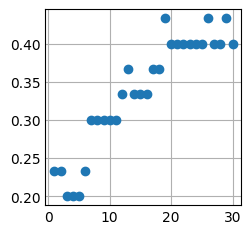

In [43]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

em = []
for i in range(30):
    em.append(i+1)
x1 = em
y1 = acc

fig, ax = plt.subplots()

ax.scatter(x1, y1)

plt.show()

In [44]:
from sklearn.neighbors import BallTree
from copy import deepcopy
from sklearn.metrics import accuracy_score
import numpy as np 

myTree = BallTree(x_stan_train)
y_test = np.array(y_test)
y_test_predict = deepcopy(y_test)
for i in range(y_test.shape[0]):
    distance,index = myTree.query(x_stan_test[i].reshape(-1, 4), k = 9)
    distance = distance.reshape((-1,)).tolist()
    index = index.reshape((-1,)).tolist()
    index = np.array(index)
    distance = np.array(distance)
    y_temp = np.array(y)
    y_neighbors = y_temp[index]
    y_test_predict[i] = weighted_classification(distance,y_neighbors)


In [45]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,y_test_predict)
confusion

array([[6, 1, 4],
       [3, 3, 1],
       [7, 5, 0]], dtype=int64)

From 11 instance from class 1, 6 of them recognize as 1 , 1 of them as 2 and 4 of them as 3.<br>
From 7 instance from class 2, 3 of them recognize as 1 , 3 of them as 2 and 1 of them as 3.<br>
From 12 instance from class 3, 7 of them recognize as 1 , 5 of them as 2 and 0 of them as 3.

این دو روش جواب های یکسانی می دهند اما تفاوت آنها در نحوه رسیدن به این جواب است که در کل روش دوم مقداری سریع تر به جواب می رسد و این تفاوت سرعت برای داده های با حجم زیاد قابل مشاهده است.